In [1]:
import  pandas as pd 
import  numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from matplotlib.ticker import MaxNLocator

**3.2) Task #1: Unsupervised learning, PCA of NIR data**

In [2]:
sawdust_train = pd.read_excel('sawdust_train.xlsx')
sawdust_train

,Primary ID,OBSNAM,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,...,w2294,w2295,w2296,w2297,w2298,w2299,w2300,Spruce,Pine,Birch
0,1,02a,1.83444,1.83416,1.83350,1.83237,1.83084,1.82910,1.82742,1.82611,...,0.568213,0.572867,0.577625,0.582679,0.587850,0.593058,0.598025,0.00,100.00,0.00
1,2,02b,1.82992,1.82965,1.82902,1.82800,1.82667,1.82501,1.82347,1.82225,...,0.566549,0.571178,0.575774,0.580471,0.585226,0.589929,0.594470,0.00,100.00,0.00
2,5,15a,1.84602,1.84569,1.84522,1.84431,1.84311,1.84172,1.84035,1.83918,...,0.561938,0.566829,0.571796,0.577128,0.582482,0.587653,0.592419,33.33,33.33,33.33
3,6,15b,1.84556,1.84514,1.84444,1.84340,1.84206,1.84054,1.83912,1.83795,...,0.563561,0.568268,0.572794,0.577536,0.582409,0.587451,0.592277,33.33,33.33,33.33
4,9,08a,1.83770,1.83723,1.83646,1.83532,1.83385,1.83222,1.83070,1.82958,...,0.563027,0.567910,0.572684,0.577522,0.582369,0.587133,0.591635,0.00,66.65,33.35
5,10,08b,1.83173,1.83134,1.83083,1.83005,1.82899,1.82769,1.82638,1.82527,...,0.562172,0.567102,0.571914,0.576747,0.581444,0.585926,0.590067,0.00,66.65,33.35
6,11,13a,1.78048,1.78015,1.77939,1.77825,1.77660,1.77482,1.77317,1.77191,...,0.554155,0.559270,0.564145,0.569133,0.574096,0.578818,0.583057,16.66,16.66,66.67
7,12,13b,1.78217,1.78189,1.78131,1.78035,1.77897,1.77745,1.77606,1.77499,...,0.552519,0.557209,0.562120,0.567389,0.572813,0.578213,0.583234,16.66,16.66,66.67
8,17,11a,1.80897,1.80839,1.80753,1.80636,1.80493,1.80342,1.80205,1.80099,...,0.543892,0.548874,0.553830,0.559087,0.564305,0.569359,0.573966,66.67,16.66,16.66
9,18,11b,1.80260,1.80223,1.80160,1.80067,1.79940,1.79788,1.79646,1.79531,...,0.544048,0.549074,0.553642,0.558111,0.562464,0.566793,0.570855,66.67,16.66,16.66


**A) Generate the plot of all the training set raw NIR data.**

In [3]:
sawdust_spectra = sawdust_train.iloc[:,2:1203]
sawdust_spectra

,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,...,w2291,w2292,w2293,w2294,w2295,w2296,w2297,w2298,w2299,w2300
0,1.83444,1.83416,1.83350,1.83237,1.83084,1.82910,1.82742,1.82611,1.82516,1.82452,...,0.554586,0.559044,0.563587,0.568213,0.572867,0.577625,0.582679,0.587850,0.593058,0.598025
1,1.82992,1.82965,1.82902,1.82800,1.82667,1.82501,1.82347,1.82225,1.82135,1.82070,...,0.551910,0.556829,0.561744,0.566549,0.571178,0.575774,0.580471,0.585226,0.589929,0.594470
2,1.84602,1.84569,1.84522,1.84431,1.84311,1.84172,1.84035,1.83918,1.83834,1.83773,...,0.547198,0.552090,0.557003,0.561938,0.566829,0.571796,0.577128,0.582482,0.587653,0.592419
3,1.84556,1.84514,1.84444,1.84340,1.84206,1.84054,1.83912,1.83795,1.83714,1.83658,...,0.547984,0.553266,0.558515,0.563561,0.568268,0.572794,0.577536,0.582409,0.587451,0.592277
4,1.83770,1.83723,1.83646,1.83532,1.83385,1.83222,1.83070,1.82958,1.82862,1.82806,...,0.547705,0.552726,0.557880,0.563027,0.567910,0.572684,0.577522,0.582369,0.587133,0.591635
5,1.83173,1.83134,1.83083,1.83005,1.82899,1.82769,1.82638,1.82527,1.82435,1.82359,...,0.547361,0.552224,0.557200,0.562172,0.567102,0.571914,0.576747,0.581444,0.585926,0.590067
6,1.78048,1.78015,1.77939,1.77825,1.77660,1.77482,1.77317,1.77191,1.77113,1.77084,...,0.537287,0.543007,0.548699,0.554155,0.559270,0.564145,0.569133,0.574096,0.578818,0.583057
7,1.78217,1.78189,1.78131,1.78035,1.77897,1.77745,1.77606,1.77499,1.77433,1.77397,...,0.539009,0.543364,0.547846,0.552519,0.557209,0.562120,0.567389,0.572813,0.578213,0.583234
8,1.80897,1.80839,1.80753,1.80636,1.80493,1.80342,1.80205,1.80099,1.80026,1.79969,...,0.528280,0.533482,0.538662,0.543892,0.548874,0.553830,0.559087,0.564305,0.569359,0.573966
9,1.80260,1.80223,1.80160,1.80067,1.79940,1.79788,1.79646,1.79531,1.79445,1.79384,...,0.527145,0.532750,0.538493,0.544048,0.549074,0.553642,0.558111,0.562464,0.566793,0.570855


<AxesSubplot:title={'center':'Raw NIR data of 30 data points (lines)'}, xlabel='Wavelength', ylabel='Signal'>

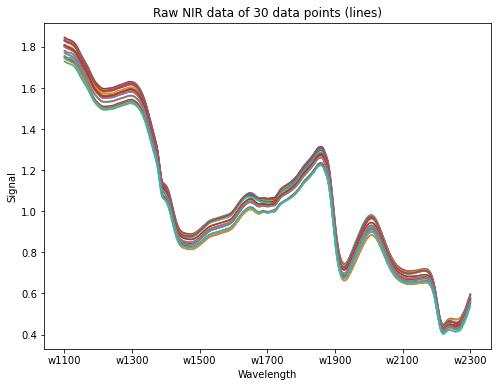

In [4]:
#A
sawdust_spectra.transpose().plot(legend=None,figsize=(8,6),title='Raw NIR data of 30 data points (lines)',xlabel='Wavelength',ylabel='Signal')

**B) Pre-process the NIR data and perform PCA for 5 components.**

In [5]:
scaler = StandardScaler(with_std=False)
scaler

StandardScaler(with_std=False)

In [6]:
sawdust_spectra_scaled = scaler.fit_transform(sawdust_spectra)
sawdust_spectra_scaled

array([[ 0.04057267,  0.040718  ,  0.04074367, ...,  0.02684677,
         0.02725577,  0.02789977],
       [ 0.03605267,  0.036208  ,  0.03626367, ...,  0.02422277,
         0.02412677,  0.02434477],
       [ 0.05215267,  0.052248  ,  0.05246367, ...,  0.02147877,
         0.02185077,  0.02229377],
       ...,
       [-0.02362733, -0.023852  , -0.02383633, ..., -0.01323423,
        -0.01287223, -0.01283723],
       [-0.06532733, -0.065562  , -0.06553633, ..., -0.03093823,
        -0.03125823, -0.03187423],
       [-0.06357733, -0.063732  , -0.06377633, ..., -0.03092723,
        -0.03087323, -0.03124523]])

In [7]:
pca = PCA(n_components=5, svd_solver='full')

In [8]:
pca_scores = pca.fit_transform(sawdust_spectra_scaled)

In [9]:
scores_pd_train = pd.DataFrame(data = pca_scores
                         ,columns = ['PC1', 'PC2','PC3','PC4','PC5']
                         ,index = sawdust_spectra.index)
scores_pd_train

,PC1,PC2,PC3,PC4,PC5
0,-1.078295,-0.047001,0.251280,0.024857,0.003036
1,-0.929153,-0.060230,0.245587,0.000213,-0.003432
2,-1.022756,-0.305001,-0.042607,0.020161,-0.021894
3,-1.019964,-0.295982,-0.037858,0.021896,-0.026418
4,-1.184856,-0.018965,0.083824,-0.021246,-0.009141
5,-1.095564,0.004305,0.085434,-0.023682,-0.008591
6,-0.429080,0.383454,-0.016684,0.107723,-0.004963
7,-0.482592,0.379079,-0.008178,0.101704,-0.004043
8,0.070632,-0.290886,-0.044821,0.048580,-0.003262
9,0.198855,-0.264795,-0.043709,0.049472,-0.002781


In [10]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2','PC3','PC4','PC5']
                           ,index = sawdust_spectra.columns)
loadings_pd

,PC1,PC2,PC3,PC4,PC5
w1100,-0.034221,-0.065116,0.005665,-0.036834,0.034033
w1101,-0.034276,-0.064894,0.005843,-0.036801,0.029723
w1102,-0.034303,-0.064643,0.005948,-0.037266,0.025164
w1103,-0.034311,-0.064478,0.006022,-0.037800,0.022163
w1104,-0.034327,-0.064430,0.005969,-0.038608,0.021055
...,...,...,...,...,...
w2296,-0.017195,-0.007921,0.029052,0.075289,-0.059924
w2297,-0.017148,-0.007882,0.028378,0.076721,-0.057624
w2298,-0.017126,-0.007856,0.028030,0.078477,-0.056627
w2299,-0.017170,-0.007917,0.027927,0.080656,-0.059458


**C) Plot the cumulative explained variance versus the number of components.**

In [11]:
pca.explained_variance_

array([7.98373089e-01, 7.94695707e-02, 1.01262970e-02, 2.96991702e-03,
       2.00732349e-04])

In [12]:
pca.explained_variance_ratio_*100

array([8.95578453e+01, 8.91453334e+00, 1.13592173e+00, 3.33151722e-01,
       2.25172377e-02])

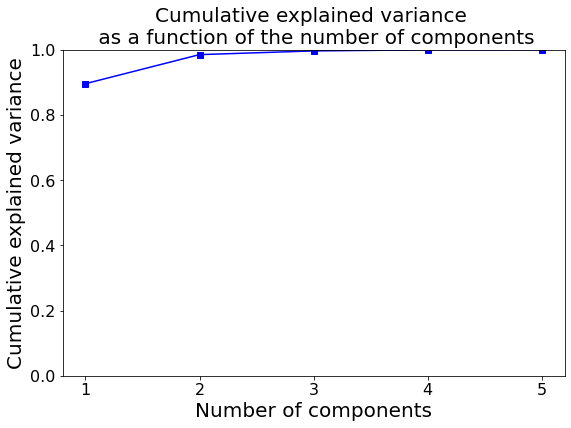

In [13]:
fig = plt.figure(figsize=(9, 6))
sub0 = fig.add_subplot(111)
plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'b-s')
sub0.set_xlabel('Number of components', fontsize=20)
sub0.set_ylabel('Cumulative explained variance', fontsize=20)
sub0.set_title('Cumulative explained variance \n as a function of the number of components', fontsize=20)
sub0.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=16)
plt.ylim(0,1)
plt.show()

1) It can be observed from the variance that the eigen values are reducing which are a part of PCA.
The variance ratio tells us that the first component captures 89.5% of the information, the second captures 8.9% and so on.
Cummulatively, 100% of the information is captured by all the 5 components which makes the model highly commendable.

2) However, 3 components are sufficient to capture 99% of the variance

**D) Plot the PCA scores for the first two component**

In [14]:
def score_plot(scores, score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    
    fig = plt.figure(figsize=(9, 9))
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T, score_labels):
        plt.text(x, y, label, ha='center', size=11)
        
    plt.hlines(0, -1, 1, linestyles='solid', linewidth=3)
    plt.vlines(0, -1, 1, linestyles='solid', linewidth=3)
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

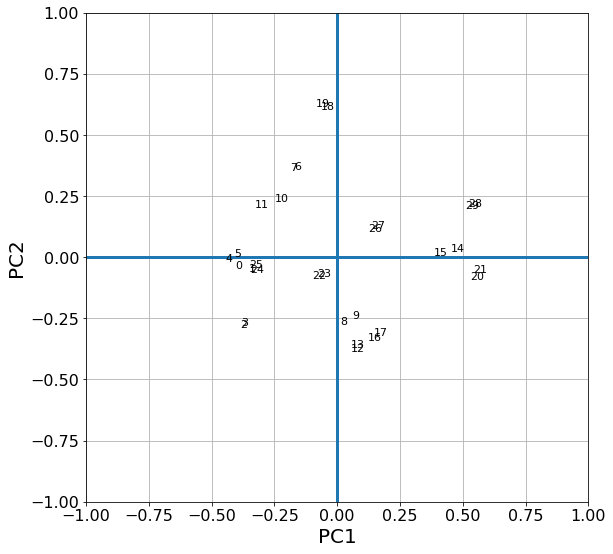

In [15]:
score_plot(pca_scores[:,:2], score_labels=scores_pd_train.index)
plt.show()

From the above scores plot, we observe that, sample points move in pairs. The data points look pretty distorted. Few outliers that show major error percent are samples 18, 19, 12 and 13. Majority of the sample points lie between an error tolerance of +0.25 to -0.25.

**E) Plot the loadings of the first two components**

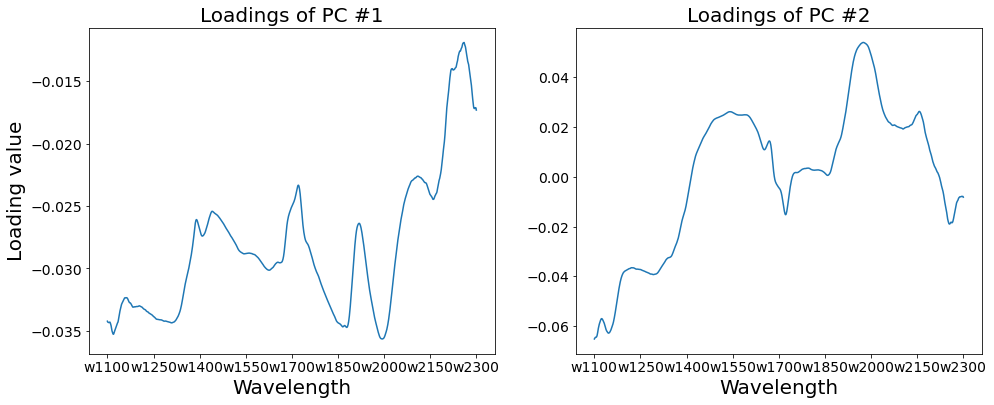

In [16]:
fig0 = plt.figure(figsize=(16, 6))
sub1 = fig0.add_subplot(121)
plt.plot(loadings_pd['PC1'],'-')
sub1.set_xlabel('Wavelength', fontsize=20)
sub1.set_ylabel('Loading value', fontsize=20)
sub1.set_title('Loadings of PC #1', fontsize=20)
sub1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=14)

sub2 = fig0.add_subplot(122)
plt.plot(loadings_pd['PC2'],'-')
sub2.set_xlabel('Wavelength', fontsize=20)
sub2.set_title('Loadings of PC #2', fontsize=20)
sub2.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=14)

plt.show()

In PC2 wavelenghts between the range 1850 to 2300 nm shows a positive loading value. This means that the a positive correlation exists between original variables and the component and viceversa.

**F) Apply the dimensionality reduction with the PCA model you developed in step B for
the test set using the transform method.**

In [17]:
sawdust_test = pd.read_excel('sawdust_pred.xlsx')
sawdust_test

,Primary ID,OBSNAM,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,...,w2294,w2295,w2296,w2297,w2298,w2299,w2300,Spruce,Pine,Birch
0,3,27a,1.81358,1.81322,1.81260,1.81163,1.81039,1.80906,1.80790,1.80710,...,0.554158,0.559145,0.564020,0.569030,0.574032,0.578976,0.583663,10,10,80
1,4,27b,1.81596,1.81561,1.81501,1.81407,1.81282,1.81141,1.81011,1.80915,...,0.553986,0.558641,0.563356,0.568291,0.573301,0.578249,0.582786,10,10,80
2,7,25a,1.78716,1.78692,1.78634,1.78540,1.78391,1.78218,1.78059,1.77917,...,0.550425,0.554899,0.559244,0.563942,0.568828,0.573971,0.579059,80,10,10
3,8,25b,1.78042,1.77997,1.77926,1.77823,1.77693,1.77544,1.77406,1.77293,...,0.546347,0.551737,0.556951,0.562219,0.567279,0.572146,0.576698,80,10,10
4,13,17a,1.77133,1.77099,1.77031,1.76935,1.76811,1.76680,1.76563,1.76467,...,0.531376,0.535909,0.540315,0.544800,0.549163,0.553316,0.557163,25,50,25
5,14,17b,1.76519,1.76477,1.76401,1.76292,1.76143,1.75980,1.75824,1.75704,...,0.528003,0.532696,0.537328,0.542243,0.547303,0.552375,0.556934,25,50,25
6,15,20a,1.80338,1.80302,1.80225,1.80105,1.79942,1.79753,1.79581,1.79451,...,0.548729,0.554031,0.559213,0.564588,0.569960,0.575186,0.580128,50,10,40
7,16,20b,1.80347,1.80308,1.80243,1.80148,1.80018,1.79860,1.79707,1.79572,...,0.549973,0.555515,0.560995,0.566629,0.572065,0.577189,0.581623,50,10,40
8,23,26a,1.77958,1.77923,1.77851,1.77739,1.77585,1.77407,1.77236,1.77096,...,0.531467,0.536348,0.540972,0.545828,0.550341,0.554430,0.557804,10,80,10
9,24,26b,1.78660,1.78591,1.78499,1.78380,1.78236,1.78084,1.77951,1.77851,...,0.532655,0.536440,0.540345,0.544834,0.549624,0.554474,0.559020,10,80,10


**Applying dimensionality reduction with the PCA for the test set**

In [18]:
sawdust_spectra_2 = sawdust_test.iloc[:,2:1203]
sawdust_spectra_2

,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,...,w2291,w2292,w2293,w2294,w2295,w2296,w2297,w2298,w2299,w2300
0,1.81358,1.81322,1.81260,1.81163,1.81039,1.80906,1.80790,1.80710,1.80665,1.80652,...,0.538656,0.543831,0.549036,0.554158,0.559145,0.564020,0.569030,0.574032,0.578976,0.583663
1,1.81596,1.81561,1.81501,1.81407,1.81282,1.81141,1.81011,1.80915,1.80864,1.80852,...,0.539687,0.544487,0.549293,0.553986,0.558641,0.563356,0.568291,0.573301,0.578249,0.582786
2,1.78716,1.78692,1.78634,1.78540,1.78391,1.78218,1.78059,1.77917,1.77823,1.77766,...,0.535891,0.540838,0.545726,0.550425,0.554899,0.559244,0.563942,0.568828,0.573971,0.579059
3,1.78042,1.77997,1.77926,1.77823,1.77693,1.77544,1.77406,1.77293,1.77212,1.77133,...,0.530337,0.535487,0.540901,0.546347,0.551737,0.556951,0.562219,0.567279,0.572146,0.576698
4,1.77133,1.77099,1.77031,1.76935,1.76811,1.76680,1.76563,1.76467,1.76401,1.76346,...,0.517237,0.521950,0.526659,0.531376,0.535909,0.540315,0.544800,0.549163,0.553316,0.557163
5,1.76519,1.76477,1.76401,1.76292,1.76143,1.75980,1.75824,1.75704,1.75625,1.75572,...,0.512516,0.517724,0.522906,0.528003,0.532696,0.537328,0.542243,0.547303,0.552375,0.556934
6,1.80338,1.80302,1.80225,1.80105,1.79942,1.79753,1.79581,1.79451,1.79374,1.79332,...,0.532382,0.537769,0.543276,0.548729,0.554031,0.559213,0.564588,0.569960,0.575186,0.580128
7,1.80347,1.80308,1.80243,1.80148,1.80018,1.79860,1.79707,1.79572,1.79466,1.79390,...,0.534359,0.539131,0.544370,0.549973,0.555515,0.560995,0.566629,0.572065,0.577189,0.581623
8,1.77958,1.77923,1.77851,1.77739,1.77585,1.77407,1.77236,1.77096,1.77002,1.76940,...,0.516593,0.521363,0.526337,0.531467,0.536348,0.540972,0.545828,0.550341,0.554430,0.557804
9,1.78660,1.78591,1.78499,1.78380,1.78236,1.78084,1.77951,1.77851,1.77788,1.77731,...,0.520528,0.524766,0.528765,0.532655,0.536440,0.540345,0.544834,0.549624,0.554474,0.559020


In [19]:
scaler = StandardScaler(with_std=False)
scaler

StandardScaler(with_std=False)

In [20]:
sawdust_spectra_scaled_2 = scaler.fit_transform(sawdust_spectra_2)
sawdust_spectra_scaled_2

array([[ 0.04189583,  0.04193792,  0.04198625, ...,  0.02153662,
         0.02166713,  0.02209979],
       [ 0.04427583,  0.04432792,  0.04439625, ...,  0.02080562,
         0.02094013,  0.02122279],
       [ 0.01547583,  0.01563792,  0.01572625, ...,  0.01633262,
         0.01666213,  0.01749579],
       ...,
       [-0.03905417, -0.03898208, -0.03875375, ..., -0.02091537,
        -0.02103787, -0.02135321],
       [ 0.00615583,  0.00626792,  0.00630625, ..., -0.00716838,
        -0.00703787, -0.00717021],
       [ 0.01154583,  0.01122792,  0.01113625, ..., -0.00773137,
        -0.00775287, -0.00783921]])

In [21]:
pca_scores = pca.transform(sawdust_spectra_scaled_2)

In [22]:
scores_pd_2 = pd.DataFrame(data = pca_scores
                         ,columns = ['PC1', 'PC2','PC3','PC4','PC5']
                         ,index = sawdust_spectra_2.index)
scores_pd_2

,PC1,PC2,PC3,PC4,PC5
0,-1.307827,0.028175,-0.097886,-0.017297,-0.035266
1,-1.294274,-0.011030,-0.096672,-0.038743,-0.044240
2,-0.026267,-0.289205,0.012457,0.143837,-0.013644
3,0.117481,-0.249195,0.019427,0.140268,-0.011839
4,0.242472,-0.100607,0.043706,-0.041089,-0.024771
5,0.348888,-0.047788,0.047664,-0.039262,-0.017478
6,-0.768595,-0.120196,-0.053438,0.064003,-0.003231
7,-0.839587,-0.091874,-0.058295,0.072817,0.006333
8,0.061266,-0.125089,0.086982,-0.047033,0.009597
9,-0.081896,-0.138548,0.088155,-0.052862,0.015019


In [23]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2','PC3','PC4','PC5']
                           ,index = sawdust_spectra_2.columns)
loadings_pd

,PC1,PC2,PC3,PC4,PC5
w1100,-0.034221,-0.065116,0.005665,-0.036834,0.034033
w1101,-0.034276,-0.064894,0.005843,-0.036801,0.029723
w1102,-0.034303,-0.064643,0.005948,-0.037266,0.025164
w1103,-0.034311,-0.064478,0.006022,-0.037800,0.022163
w1104,-0.034327,-0.064430,0.005969,-0.038608,0.021055
...,...,...,...,...,...
w2296,-0.017195,-0.007921,0.029052,0.075289,-0.059924
w2297,-0.017148,-0.007882,0.028378,0.076721,-0.057624
w2298,-0.017126,-0.007856,0.028030,0.078477,-0.056627
w2299,-0.017170,-0.007917,0.027927,0.080656,-0.059458


In [24]:
scores_pd_2_new = scores_pd_2.iloc[:,0:2]
scores_pd_2_new

,PC1,PC2
0,-1.307827,0.028175
1,-1.294274,-0.011030
2,-0.026267,-0.289205
3,0.117481,-0.249195
4,0.242472,-0.100607
5,0.348888,-0.047788
6,-0.768595,-0.120196
7,-0.839587,-0.091874
8,0.061266,-0.125089
9,-0.081896,-0.138548


In [25]:
scores_pd_train

,PC1,PC2,PC3,PC4,PC5
0,-1.078295,-0.047001,0.251280,0.024857,0.003036
1,-0.929153,-0.060230,0.245587,0.000213,-0.003432
2,-1.022756,-0.305001,-0.042607,0.020161,-0.021894
3,-1.019964,-0.295982,-0.037858,0.021896,-0.026418
4,-1.184856,-0.018965,0.083824,-0.021246,-0.009141
5,-1.095564,0.004305,0.085434,-0.023682,-0.008591
6,-0.429080,0.383454,-0.016684,0.107723,-0.004963
7,-0.482592,0.379079,-0.008178,0.101704,-0.004043
8,0.070632,-0.290886,-0.044821,0.048580,-0.003262
9,0.198855,-0.264795,-0.043709,0.049472,-0.002781


In [26]:
scores_pd_train_new = scores_pd_train.iloc[:,0:2]
scores_pd_train_new

,PC1,PC2
0,-1.078295,-0.047001
1,-0.929153,-0.060230
2,-1.022756,-0.305001
3,-1.019964,-0.295982
4,-1.184856,-0.018965
5,-1.095564,0.004305
6,-0.429080,0.383454
7,-0.482592,0.379079
8,0.070632,-0.290886
9,0.198855,-0.264795


**G) Create a scatter plot of the scores in PC1, PC2 of all 54 points in the train and test
data set, coloured by the set they belong to (suggestion: use sns.scatterplot). Why is
it important to overlap the scores of both train and test set in one graph? What are
you checking to see**

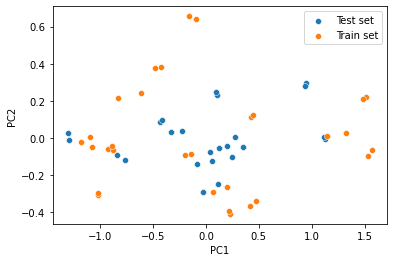

In [27]:
sns.scatterplot(data=scores_pd_2_new, x="PC1", y="PC2")
sns.scatterplot(data=scores_pd_train_new, x="PC1",y="PC2" )
plt.legend(['Test set', 'Train set'])

We are overlapping the scores of both "train" and "test" set to check if the model converges. Since we are following an unsupervised learning approach, we do not have a specific target. By overlapping the train and test data, we come to know if the predition made by the training model was correct

### 3.3 Task 2: Supervised learning, PLS model

**A) Run the PLS regression to model all 3 outputs with the scaled train set spectra.
Increase the number of components to achieve R2 value of at least 0.92 (use PLSRe-
gression's method score to estimate R2).**

In [28]:
y = sawdust_train.iloc[:, -3:]
y

,Spruce,Pine,Birch
0,0.00,100.00,0.00
1,0.00,100.00,0.00
2,33.33,33.33,33.33
3,33.33,33.33,33.33
4,0.00,66.65,33.35
5,0.00,66.65,33.35
6,16.66,16.66,66.67
7,16.66,16.66,66.67
8,66.67,16.66,16.66
9,66.67,16.66,16.66


In [48]:
### Scaled train data
sawdust_spectra_scaled

array([[ 0.04057267,  0.040718  ,  0.04074367, ...,  0.02684677,
         0.02725577,  0.02789977],
       [ 0.03605267,  0.036208  ,  0.03626367, ...,  0.02422277,
         0.02412677,  0.02434477],
       [ 0.05215267,  0.052248  ,  0.05246367, ...,  0.02147877,
         0.02185077,  0.02229377],
       ...,
       [-0.02362733, -0.023852  , -0.02383633, ..., -0.01323423,
        -0.01287223, -0.01283723],
       [-0.06532733, -0.065562  , -0.06553633, ..., -0.03093823,
        -0.03125823, -0.03187423],
       [-0.06357733, -0.063732  , -0.06377633, ..., -0.03092723,
        -0.03087323, -0.03124523]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(sawdust_spectra_scaled, y, test_size=1/2, random_state=23)

In [31]:
pls_sklearn = PLSRegression(n_components=4, scale=False)
pls_sklearn.fit(X_train, y_train)

PLSRegression(n_components=4, scale=False)

In [32]:
pls_sklearn.score(X_train,y_train)

0.9746210839737389

When the number of components are increased to 4, we get R square value around 0.975

**B) Predict the output values for the inputs in the test set and compare them by plot-
ting the 24 actual vs predicted values in a 1x3 subplot (for spruce, pine and birch,
respectively). Also, include the y=x line for reference.**

In [33]:
y1 = sawdust_train.iloc[:, -1:]
y1

,Birch
0,0.00
1,0.00
2,33.33
3,33.33
4,33.35
5,33.35
6,66.67
7,66.67
8,16.66
9,16.66


In [34]:
X_train, X_test, y_train, y_test = train_test_split(sawdust_spectra_scaled, y1, test_size=1/2, random_state=23)

In [35]:
pls_sklearn = PLSRegression(n_components=2, scale=False)
pls_sklearn.fit(X_train, y_train)

PLSRegression(scale=False)

In [36]:
y_train_predicted = pls_sklearn.predict(X_train)
y_test_predicted = pls_sklearn.predict(X_test)

Text(0.5, 1.0, 'Birch')

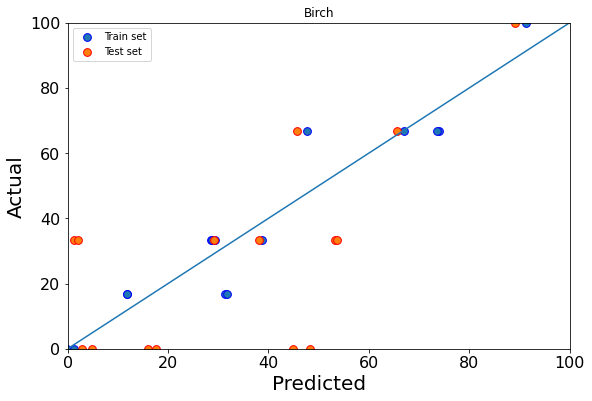

In [37]:
fig2 = plt.figure(figsize=(9, 6))
sub5 = fig2.add_subplot(111)
plt.scatter(y_train_predicted, y_train, s=60, marker="o", edgecolors='b')
plt.scatter(y_test_predicted, y_test, s=60, marker="o", edgecolors='r')
plt.legend(['Train set', 'Test set'])
plt.plot([0, 100], [0, 100])
plt.xlabel('Predicted', fontsize = 20)
plt.ylabel('Actual', fontsize = 20)
plt.tick_params(labelsize=16)
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.title('Birch')

In [38]:
y2 = sawdust_train['Pine']
y2

0     100.00
1     100.00
2      33.33
3      33.33
4      66.65
5      66.65
6      16.66
7      16.66
8      16.66
9      16.66
10     33.35
11     33.35
12      0.00
13      0.00
14     66.65
15     66.65
16      0.00
17      0.00
18      0.00
19      0.00
20     33.35
21     33.35
22     66.67
23     66.67
24      0.00
25      0.00
26     33.33
27     33.33
28     33.33
29     33.33
Name: Pine, dtype: float64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(sawdust_spectra_scaled, y2, test_size=1/2, random_state=23)

In [40]:
pls_sklearn = PLSRegression(n_components=2, scale=False)
pls_sklearn.fit(X_train, y_train)

PLSRegression(scale=False)

In [41]:
y_train_predicted = pls_sklearn.predict(X_train)
y_test_predicted = pls_sklearn.predict(X_test)

Text(0.5, 1.0, 'Pine')

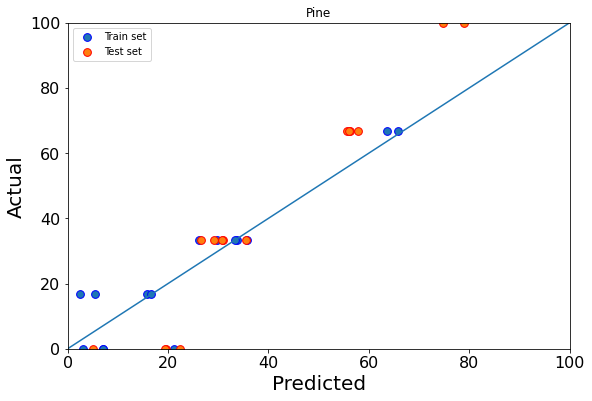

In [42]:
fig2 = plt.figure(figsize=(9, 6))
sub5 = fig2.add_subplot(111)
plt.scatter(y_train_predicted, y_train, s=60, marker="o", edgecolors='b')
plt.scatter(y_test_predicted, y_test, s=60, marker="o", edgecolors='r')
plt.legend(['Train set', 'Test set'])
plt.plot([0, 100], [0, 100])
plt.xlabel('Predicted', fontsize = 20)
plt.ylabel('Actual', fontsize = 20)
plt.tick_params(labelsize=16)
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.title('Pine')

In [43]:
y3 = sawdust_train['Spruce']
y3

0       0.00
1       0.00
2      33.33
3      33.33
4       0.00
5       0.00
6      16.66
7      16.66
8      66.67
9      66.67
10      0.00
11      0.00
12    100.00
13    100.00
14     33.35
15     33.35
16     66.65
17     66.65
18      0.00
19      0.00
20     66.65
21     66.65
22     16.66
23     16.66
24     33.35
25     33.35
26     33.33
27     33.33
28     33.33
29     33.33
Name: Spruce, dtype: float64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(sawdust_spectra_scaled, y3, test_size=1/2, random_state=23)

In [45]:
pls_sklearn = PLSRegression(n_components=2, scale=False)
pls_sklearn.fit(X_train, y_train)

PLSRegression(scale=False)

In [46]:
y_train_predicted = pls_sklearn.predict(X_train)
y_test_predicted = pls_sklearn.predict(X_test)

Text(0.5, 1.0, 'Spruce')

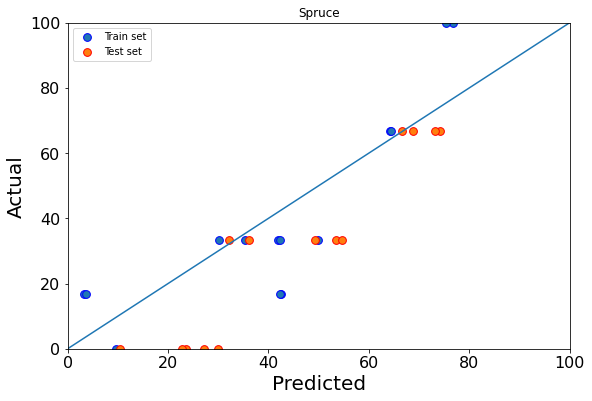

In [47]:
fig2 = plt.figure(figsize=(9, 6))
sub5 = fig2.add_subplot(111)
plt.scatter(y_train_predicted, y_train, s=60, marker="o", edgecolors='b')
plt.scatter(y_test_predicted, y_test, s=60, marker="o", edgecolors='r')
plt.legend(['Train set', 'Test set'])
plt.plot([0, 100], [0, 100])
plt.xlabel('Predicted', fontsize = 20)
plt.ylabel('Actual', fontsize = 20)
plt.tick_params(labelsize=16)
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.title('Spruce')